# Problem statement on business implications


## For an Auto Insurance company, we need to predict the conditions affecting customer lifetime value(CLV). CLV is the total revenue the client will derive from their entire relationship with a customer.

## Here we can see that as the name suggests we need to predict the customer lifetime value for each customer so as to make sure how much benefit each customer can repay to the company in exchange of the benefits he or she receives

## Approach:
## We do a regression model to find out how and why the clv gets affected and how to tackle clv so that the company can benefit and also cluster the train dataset to understand behaviour of each segment.
## We start so by taking clv as the dependent variable and the whole model based on this variable.

## Loading Libraries

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings as w
w.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor


### Reading train and test csv files

In [294]:
train=pd.read_csv('train-1574429526318.csv')
test=pd.read_csv('test-1574429501088.csv')

In [295]:
train.head(5)

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.37,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.00,2,33,nan,2.00,Personal Auto,Personal L2,Offer2,Branch,267.21,Four-Door Car,2.00
1,2057,8005.96,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.00,26,42,0.00,5.00,Personal Auto,Personal L2,Offer2,Agent,565.51,SUV,2.00
2,4119,8646.50,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.00,3,44,0.00,3.00,Personal Auto,Personal L1,Offer2,Branch,369.82,SUV,1.00
3,1801,9294.09,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.00,2,15,nan,3.00,Corporate Auto,Corporate L3,Offer1,Branch,556.80,SUV,3.00
4,9618,5595.97,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.00,3,68,0.00,5.00,Personal Auto,Personal L1,Offer2,Web,345.60,Two-Door Car,3.00


In [296]:
train.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

### setting options to display only two points after float


In [297]:
pd.options.display.float_format = '{:.2f}'.format


In [298]:
train.head(3)

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.37,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.00,2,33,nan,2.00,Personal Auto,Personal L2,Offer2,Branch,267.21,Four-Door Car,2.00
1,2057,8005.96,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.00,26,42,0.00,5.00,Personal Auto,Personal L2,Offer2,Agent,565.51,SUV,2.00
2,4119,8646.50,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.00,3,44,0.00,3.00,Personal Auto,Personal L1,Offer2,Branch,369.82,SUV,1.00


### converting all the column names to lower case

In [299]:

train.columns = [x.lower().replace('.','_') for x in train.columns]
test.columns = [x.lower().replace('.','_') for x in test.columns]

In [300]:
train.columns

Index(['customerid', 'customer_lifetime_value', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_geo', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

###  writing a function to get the shape,data types,null values,unique values and different levels in the dataset

In [301]:
def summary(data):
    print(data.shape)
    return ( pd.DataFrame({ "Dtypes": data.dtypes , 
                           "NA's":data.isnull().sum() , 
                           "Nunique": data.nunique() , 
                           "Levels":[data[i].unique() for i in data.columns]}))


In [302]:
summary(train)

(9806, 22)


,Dtypes,NA's,Nunique,Levels
customerid,int64,0,9806,"[5917, 2057, 4119, 1801, 9618, 2747, 3633, 385..."
customer_lifetime_value,float64,0,6477,"[7824.372789, 8005.964669, 8646.504109, 9294.0..."
coverage,object,925,3,"[Basic, Extended, nan, Premium]"
education,object,129,5,"[Bachelor, College, High School or Below, Doct..."
employmentstatus,object,118,5,"[Unemployed, Employed, Retired, Medical Leave,..."
gender,object,129,2,"[F, M, nan]"
income,object,0,4622,"[0, 63357, 64125, 67544, 19651, 23589, 74126, ..."
location_geo,object,0,2840,"[17.7,77.7, 28.8,76.6, 21.6,88.4, 19,72.5, 19...."
location_code,object,119,3,"[Urban, Suburban, Rural, nan]"
marital_status,object,129,3,"[Married, Divorced, Single, nan]"


### Checking customer_lifetime_value distribution

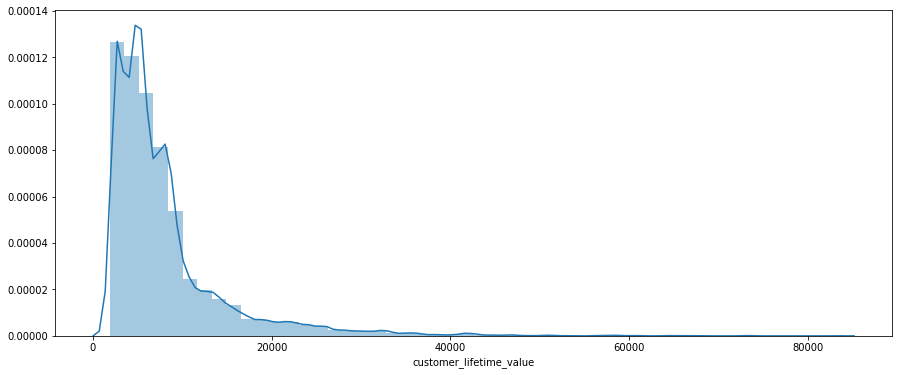

In [303]:

train1 = train.copy()
plt.figure(figsize = (15,6))
sns.distplot(train.customer_lifetime_value)
plt.show()

### since the data looks like it is sparse ,setting the threshold to be 20000

In [304]:
train = train[train.customer_lifetime_value<=20000]
train.reset_index(drop = True, inplace = True)


### checking distribution after setting threshold

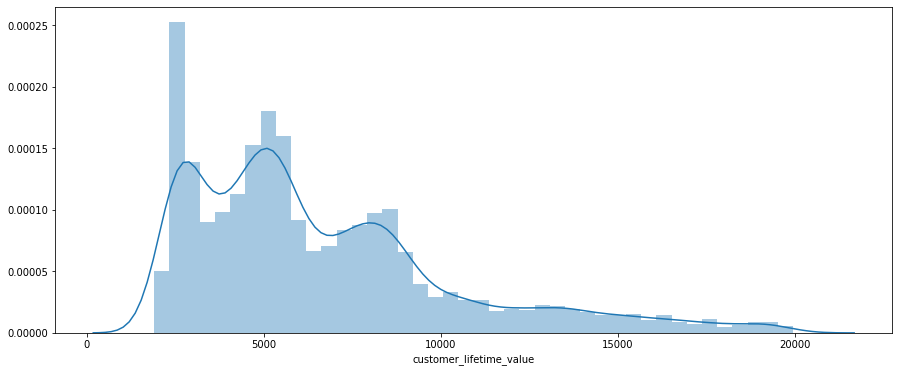

In [305]:

plt.figure(figsize = (15,6))
sns.distplot(train.customer_lifetime_value)
plt.show()

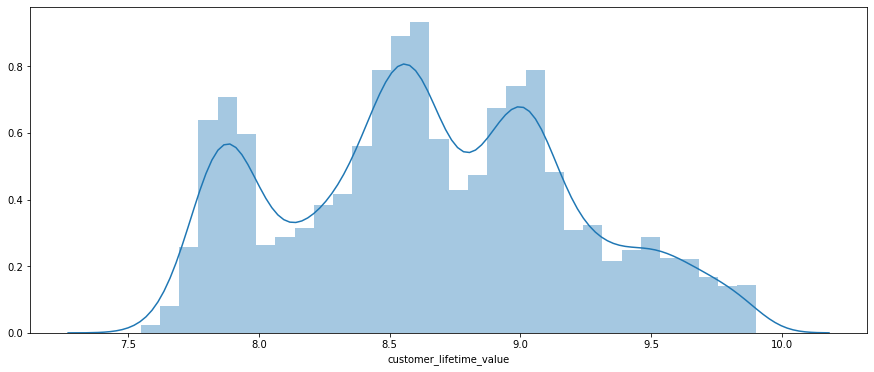

In [306]:
#Cheking for log distribution
plt.figure(figsize = (15,6))
sns.distplot(np.log(train.customer_lifetime_value))
plt.show()

In [307]:
train.customer_lifetime_value.describe()

count    9197.00
mean     6623.36
std      3765.34
min      1898.01
25%      3853.47
50%      5563.77
75%      8382.63
max     19964.40
Name: customer_lifetime_value, dtype: float64

In [308]:
train1.customer_lifetime_value.describe()

count    9806.00
mean     7998.05
std      6848.06
min      1898.01
25%      4013.95
50%      5780.18
75%      8960.28
max     83325.38
Name: customer_lifetime_value, dtype: float64

### from the above describe function we came to know that there still so many outliers pulling mean towards them

In [309]:
print(train.shape)
print(train1.shape)

(9197, 22)
(9806, 22)


### since all customerid are unique im dropping it

In [310]:
train_test = [train , test]
for i in train_test:
    i.drop('customerid' , axis=1 , inplace = True)


In [311]:
summary(train)

(9197, 21)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,6077,"[7824.372789, 8005.964669, 8646.504109, 9294.0..."
coverage,object,868,3,"[Basic, Extended, nan, Premium]"
education,object,121,5,"[Bachelor, College, High School or Below, Doct..."
employmentstatus,object,109,5,"[Unemployed, Employed, Retired, Medical Leave,..."
gender,object,121,2,"[F, M, nan]"
income,object,0,4339,"[0, 63357, 64125, 67544, 19651, 23589, 74126, ..."
location_geo,object,0,2778,"[17.7,77.7, 28.8,76.6, 21.6,88.4, 19,72.5, 19...."
location_code,object,110,3,"[Urban, Suburban, Rural, nan]"
marital_status,object,121,3,"[Married, Divorced, Single, nan]"
monthly_premium_auto,float64,752,177,"[67.0, 101.0, 108.0, 116.0, 72.0, 211.0, 90.0,..."


### coverage

In [312]:
#checking unique values
train.coverage.unique()

array(['Basic', 'Extended', nan, 'Premium'], dtype=object)

#### here we observe that there is na value 

## let us check all the na values with respect to every attribute

In [313]:
train.isna().sum()

customer_lifetime_value            0
coverage                         868
education                        121
employmentstatus                 109
gender                           121
income                             0
location_geo                       0
location_code                    110
marital_status                   121
monthly_premium_auto             752
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints        757
number_of_policies               111
policy_type                      839
policy                           111
renew_offer_type                 120
sales_channel                    120
total_claim_amount                 0
vehicle_class                    119
vehicle_size                     119
dtype: int64

### dropping all na values by row

In [314]:
train.dropna(axis=0,inplace=True)

In [315]:
train.isna().sum()

customer_lifetime_value          0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_geo                     0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [316]:
train.shape

(6518, 21)

In [317]:
#converting coverage into categorical varible both in train and test data
train.coverage=train.coverage.astype('category')
test.coverage=test.coverage.astype('category')

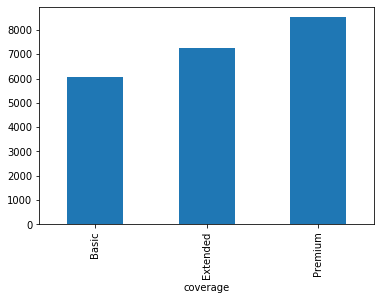

In [318]:
#value variation per coverage
train.groupby('coverage')['customer_lifetime_value'].mean().plot(kind = 'bar')

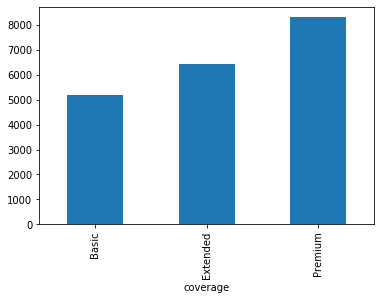

In [319]:
train.groupby('coverage')['customer_lifetime_value'].median().plot(kind = 'bar')

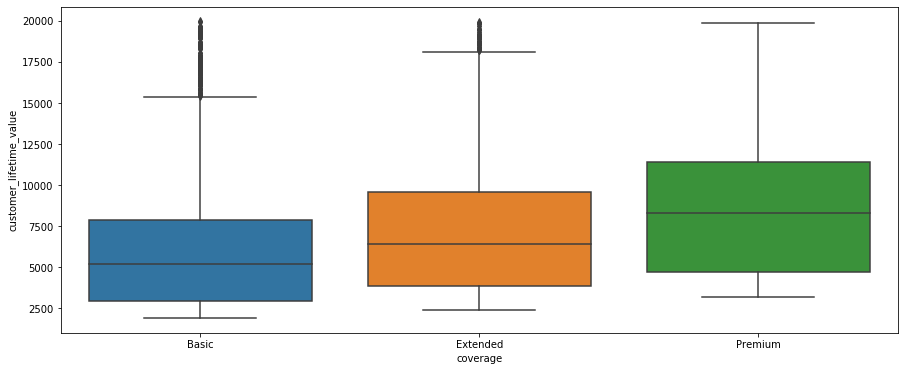

In [320]:
plt.figure(figsize = (15,6))
sns.boxplot(x = train.coverage, y = train.customer_lifetime_value)
plt.show()

In [321]:
summary(train)

(6518, 21)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,object,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,object,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,object,0,2,"[M, F]"
income,object,0,3701,"[63357, 64125, 19651, 74126, 31409, 58577, 196..."
location_geo,object,0,2448,"[28.8,76.6, 21.6,88.4, 19.1,74.7, 28.6,76.3, 1..."
location_code,object,0,3,"[Suburban, Urban, Rural]"
marital_status,object,0,3,"[Married, Divorced, Single]"
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."


## education

In [322]:
#converting education into categorical varible both in train and test data
train.education=train.education.astype('category')
test.education=test.education.astype('category')


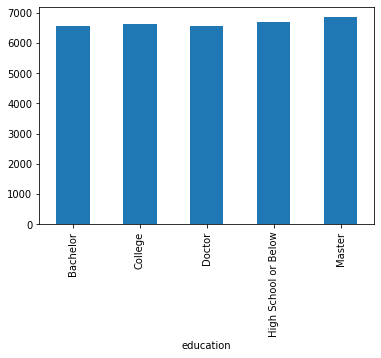

In [323]:
#value evaluation per education
train.groupby('education')['customer_lifetime_value'].mean().plot(kind = 'bar')

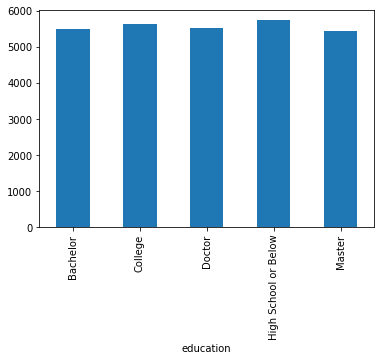

In [324]:
train.groupby('education')['customer_lifetime_value'].median().plot(kind = 'bar')

In [325]:
summary(train)

(6518, 21)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,object,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,object,0,2,"[M, F]"
income,object,0,3701,"[63357, 64125, 19651, 74126, 31409, 58577, 196..."
location_geo,object,0,2448,"[28.8,76.6, 21.6,88.4, 19.1,74.7, 28.6,76.3, 1..."
location_code,object,0,3,"[Suburban, Urban, Rural]"
marital_status,object,0,3,"[Married, Divorced, Single]"
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."


## employmentstatus

In [430]:
# converting as category both in train and test
train.employmentstatus=train.employmentstatus.astype('category')
test.employmentstatus=test.employmentstatus.astype('category')

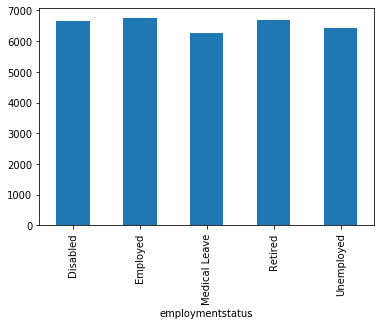

In [431]:
#value evaluation per employmentstatus
train.groupby('employmentstatus')['customer_lifetime_value'].mean().plot(kind = 'bar')

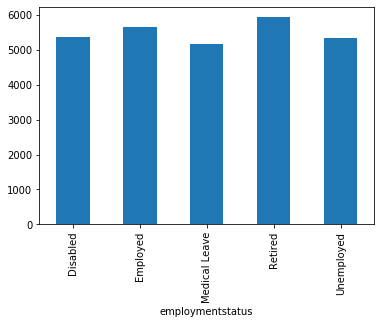

In [328]:
train.groupby('employmentstatus')['customer_lifetime_value'].median().plot(kind = 'bar')

## gender


In [329]:
# converting as category both in train and test
train.gender=train.gender.astype('category')
test.gender=test.gender.astype('category')

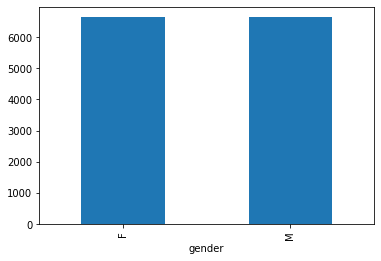

In [330]:
#value evaluation per education
train.groupby('gender')['customer_lifetime_value'].mean().plot(kind = 'bar')

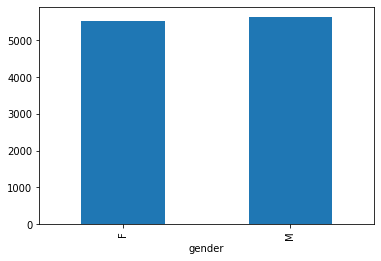

In [331]:
train.groupby('gender')['customer_lifetime_value'].median().plot(kind = 'bar')

In [332]:
summary(train)

(6518, 21)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,category,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,object,0,3701,"[63357, 64125, 19651, 74126, 31409, 58577, 196..."
location_geo,object,0,2448,"[28.8,76.6, 21.6,88.4, 19.1,74.7, 28.6,76.3, 1..."
location_code,object,0,3,"[Suburban, Urban, Rural]"
marital_status,object,0,3,"[Married, Divorced, Single]"
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."


## income

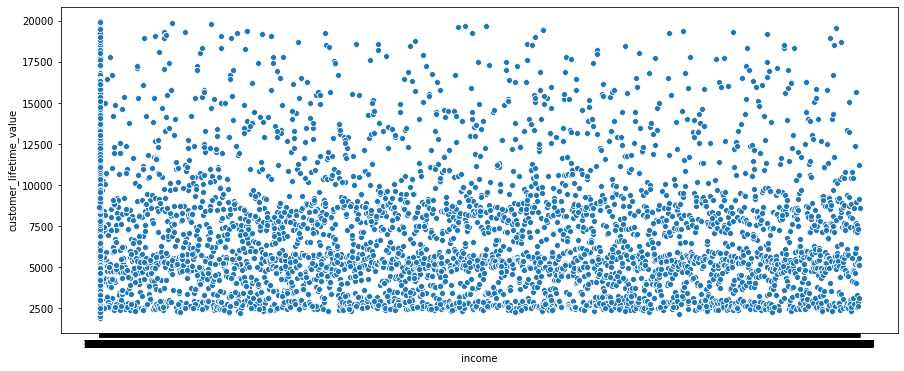

In [333]:
plt.figure(figsize = (15,6))
sns.scatterplot(train.income, train.customer_lifetime_value)
plt.show()

In [334]:
train.income.describe()

count     6518
unique    3701
top          0
freq      1683
Name: income, dtype: object

### income is object type here so converting into float

In [335]:
train.income=train.income.astype('float64')
test.income=test.income.astype('float64')

In [336]:
train.income.describe()

count    6518.00
mean    37399.54
std     30387.57
min         0.00
25%         0.00
50%     33660.50
75%     61561.75
max     99961.00
Name: income, dtype: float64

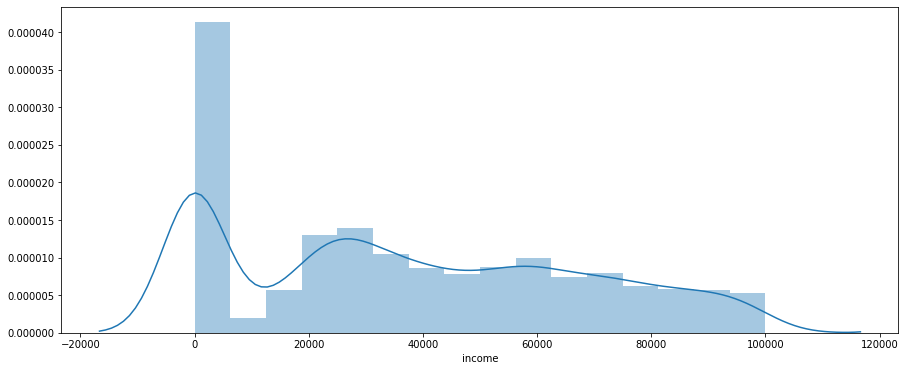

In [337]:
plt.figure(figsize = (15,6))
sns.distplot(train.income)
plt.show()

In [338]:
len(train[train.income>0])

4835

In [339]:
train.shape

(6518, 21)

In [340]:
len(train[train.income==0])

1683

## location_geo

In [341]:
train.location_geo

1       28.8,76.6
2       21.6,88.4
4       19.1,74.7
6       28.6,76.3
7       17.3,79.1
          ...    
9192    28.3,77.6
9193    18.6,72.3
9194    19.2,74.7
9195    19.5,73.9
9196    17.2,78.2
Name: location_geo, Length: 6518, dtype: object

### dropping location_geo attribute because i think location code will compensate this 

In [342]:
train_test = [train , test]
for i in train_test:
    i.drop('location_geo' , axis=1 , inplace = True)


In [343]:
train.shape

(6518, 20)

In [344]:
summary(train)

(6518, 20)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,category,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,float64,0,3701,"[63357.0, 64125.0, 19651.0, 74126.0, 31409.0, ..."
location_code,object,0,3,"[Suburban, Urban, Rural]"
marital_status,object,0,3,"[Married, Divorced, Single]"
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."
months_since_last_claim,int64,0,36,"[26, 3, 14, 10, 6, 17, 4, 8, 16, 29, 28, 1, 24..."


## location_code

In [345]:
#as there 3 unique values im converting this to category
train.location_code=train.location_code.astype('category')
test.location_code=test.location_code.astype('category')

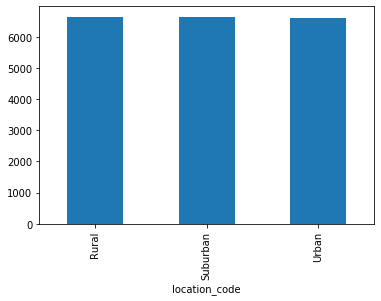

In [346]:
#value evaluation per location_code
train.groupby('location_code')['customer_lifetime_value'].mean().plot(kind = 'bar')

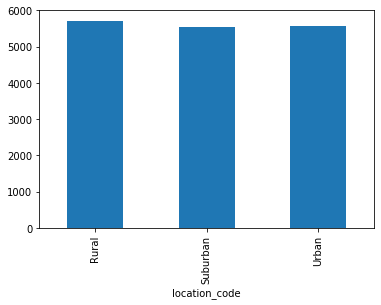

In [347]:
train.groupby('location_code')['customer_lifetime_value'].median().plot(kind = 'bar')

## marital_status

In [348]:
#converting marital_status to category in both train and test data
train.marital_status=train.marital_status.astype('category')
test.marital_status=test.marital_status.astype('category')

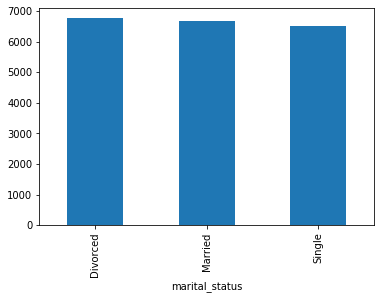

In [349]:
#value evaluation per marital_status
train.groupby('marital_status')['customer_lifetime_value'].mean().plot(kind = 'bar')

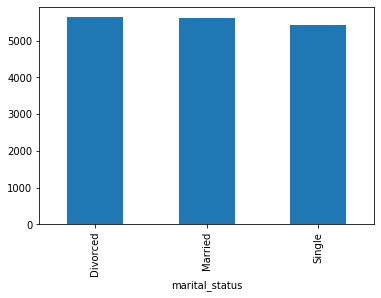

In [350]:
train.groupby('marital_status')['customer_lifetime_value'].median().plot(kind = 'bar')

## monthly_premium_auto

In [351]:
train.monthly_premium_auto

1      101.00
2      108.00
4       72.00
6       90.00
7       93.00
        ...  
9192    68.00
9193    65.00
9194    78.00
9195   113.00
9196   114.00
Name: monthly_premium_auto, Length: 6518, dtype: float64

In [352]:
train.monthly_premium_auto.describe()

count   6518.00
mean      91.96
std       32.93
min       61.00
25%       68.00
50%       82.00
75%      108.00
max      297.00
Name: monthly_premium_auto, dtype: float64

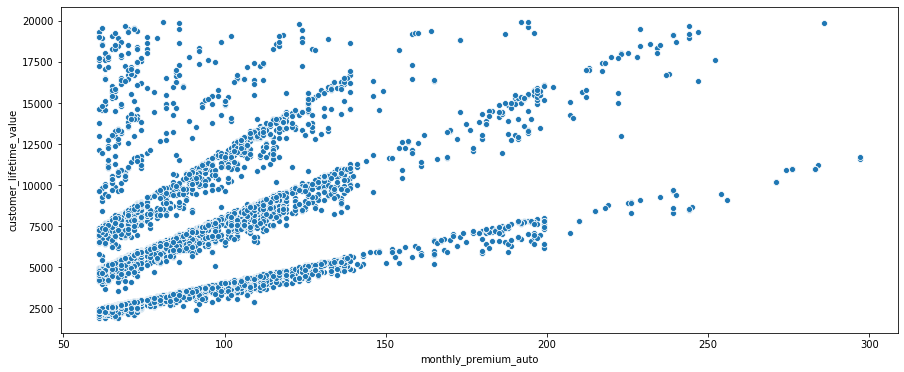

In [353]:
plt.figure(figsize = (15,6))
sns.scatterplot(train.monthly_premium_auto, train.customer_lifetime_value)
plt.show()

## months_since_last_claim

In [354]:
train.months_since_last_claim

1       26
2        3
4        3
6       14
7       10
        ..
9192     2
9193     8
9194    10
9195    22
9196    23
Name: months_since_last_claim, Length: 6518, dtype: int64

In [355]:
train.months_since_last_claim.describe()

count   6518.00
mean      15.15
std       10.04
min        0.00
25%        6.00
50%       14.00
75%       23.00
max       35.00
Name: months_since_last_claim, dtype: float64

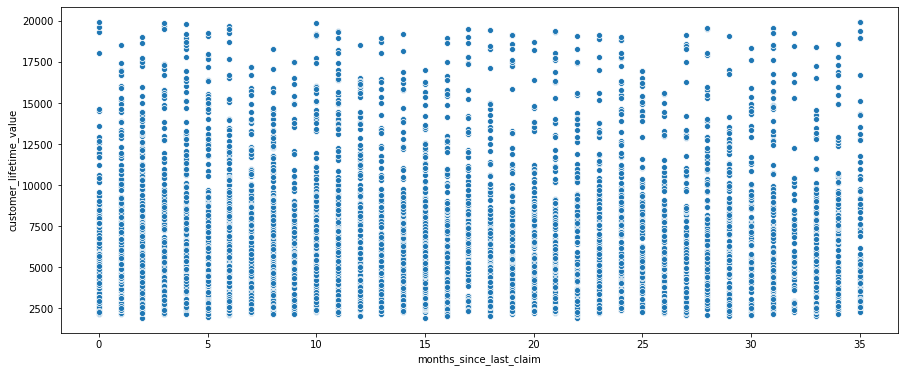

In [356]:
plt.figure(figsize = (15,6))
sns.scatterplot(train.months_since_last_claim, train.customer_lifetime_value)
plt.show()

In [357]:
train.groupby(['months_since_last_claim'])['customer_lifetime_value'].sum().sort_values(ascending=False)

months_since_last_claim
3    1855540.88
6    1798549.89
2    1763153.93
4    1640042.57
1    1590880.86
7    1580890.76
11   1497031.40
5    1473952.47
10   1462467.22
12   1402560.13
15   1399381.38
17   1285821.01
16   1259261.67
8    1227251.86
14   1223973.89
13   1212938.34
21   1187973.41
23   1178676.61
0    1169176.26
22   1140028.85
9    1119523.60
19   1116008.61
25   1097973.89
24   1085623.27
18   1066745.64
20   1042170.70
29   1027398.02
31    990169.49
28    969054.90
33    905604.88
27    877808.11
26    845451.65
34    810604.80
30    808521.40
35    625981.64
32    523517.56
Name: customer_lifetime_value, dtype: float64

## by grouping months_since_last_claim with respect to lifetime value of customer , i observed that recently claimed customers are having higher lifetime value 
## i thought to bin them into "HIGH" ,"MEDIUM","LOW" bins

In [358]:
#binning months_since_last_claim 
bins=[0,12,24,36]
labels=['HIGH','MEDIUM','LOW']
train['prior_claim']=pd.cut(train['months_since_last_claim'],bins=bins,labels=labels)

In [359]:
test['prior_claim']=pd.cut(test['months_since_last_claim'],bins=bins,labels=labels)

In [360]:
train.head(5)

,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,prior_claim
1,8005.96,Basic,College,Employed,M,63357.00,Suburban,Married,101.00,26,42,0.00,5.00,Personal Auto,Personal L2,Offer2,Agent,565.51,SUV,2.00,LOW
2,8646.50,Basic,High School or Below,Employed,F,64125.00,Urban,Married,108.00,3,44,0.00,3.00,Personal Auto,Personal L1,Offer2,Branch,369.82,SUV,1.00,HIGH
4,5595.97,Basic,Bachelor,Retired,F,19651.00,Suburban,Married,72.00,3,68,0.00,5.00,Personal Auto,Personal L1,Offer2,Web,345.60,Two-Door Car,3.00,HIGH
6,3653.70,Extended,College,Employed,F,74126.00,Suburban,Married,90.00,14,76,0.00,1.00,Corporate Auto,Corporate L3,Offer2,Call Center,478.75,Two-Door Car,2.00,MEDIUM
7,11154.68,Extended,Doctor,Employed,F,31409.00,Urban,Married,93.00,10,50,0.00,2.00,Personal Auto,Personal L3,Offer1,Branch,381.96,Four-Door Car,2.00,HIGH


In [361]:
# as i binned months_since_last_claim attribute im drooping that column
train.drop('months_since_last_claim' , axis=1 , inplace = True)


In [362]:
test.drop('months_since_last_claim' , axis=1 , inplace = True)

In [363]:
train.shape

(6518, 20)

In [364]:
summary(train)

(6518, 20)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,category,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,float64,0,3701,"[63357.0, 64125.0, 19651.0, 74126.0, 31409.0, ..."
location_code,category,0,3,"[Suburban, Urban, Rural] Categories (3, object..."
marital_status,category,0,3,"[Married, Divorced, Single] Categories (3, obj..."
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."
months_since_policy_inception,int64,0,100,"[42, 44, 68, 76, 50, 62, 41, 51, 61, 35, 4, 99..."


## months_since_policy_inspection

In [365]:
train.months_since_policy_inception

1       42
2       44
4       68
6       76
7       50
        ..
9192    10
9193    23
9194    90
9195    64
9196    54
Name: months_since_policy_inception, Length: 6518, dtype: int64

In [366]:
train.months_since_policy_inception.describe()

count   6518.00
mean      47.96
std       27.83
min        0.00
25%       24.00
50%       48.00
75%       71.00
max       99.00
Name: months_since_policy_inception, dtype: float64

In [367]:
a=pd.DataFrame(train.groupby(['months_since_policy_inception'])['customer_lifetime_value'].sum().sort_values(ascending=False))
a.head(30)

,customer_lifetime_value
months_since_policy_inception,
59,739119.34
61,666767.26
52,637054.84
43,619528.22
56,611444.15
15,584370.76
50,555694.88
62,554531.38
31,546013.01


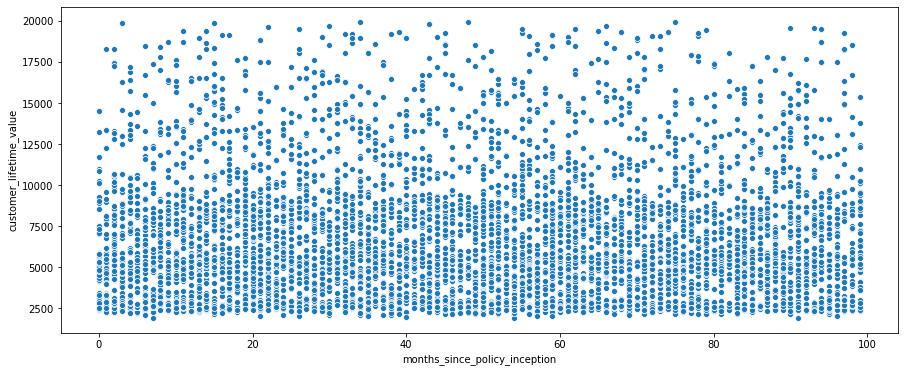

In [368]:
plt.figure(figsize = (15,6))
sns.scatterplot(train.months_since_policy_inception, train.customer_lifetime_value)
plt.show()

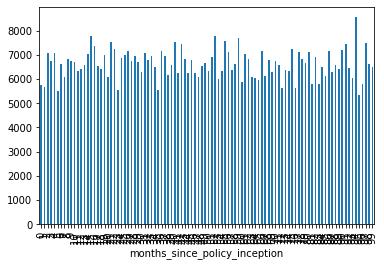

In [369]:
train.groupby('months_since_policy_inception')['customer_lifetime_value'].mean().plot(kind = 'bar')

In [370]:
train.months_since_policy_inception.value_counts(normalize = True).sort_values(ascending = False)*100

59   1.47
61   1.46
43   1.40
50   1.35
56   1.32
     ... 
96   0.75
94   0.74
98   0.60
82   0.55
97   0.54
Name: months_since_policy_inception, Length: 100, dtype: float64

### every month in months_since_policy_inception got not more than 2% ,so dropping this column

In [371]:
train_test = [train , test]
for i in train_test:
    i.drop('months_since_policy_inception' , axis=1 , inplace = True)


In [372]:
summary(train)

(6518, 19)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5145,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,category,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,float64,0,3701,"[63357.0, 64125.0, 19651.0, 74126.0, 31409.0, ..."
location_code,category,0,3,"[Suburban, Urban, Rural] Categories (3, object..."
marital_status,category,0,3,"[Married, Divorced, Single] Categories (3, obj..."
monthly_premium_auto,float64,0,173,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."
number_of_open_complaints,float64,0,6,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"


## number_of_open_complaints

In [373]:
train.number_of_open_complaints.unique()

array([0., 1., 2., 3., 4., 5.])

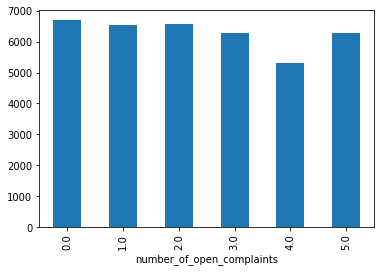

In [374]:
# value evaluation per complaint
train.groupby('number_of_open_complaints')['customer_lifetime_value'].mean().plot(kind = 'bar')

In [375]:
#converting number_of_open_complaints into categorical varible
train.number_of_open_complaints=train.number_of_open_complaints.astype('category')
test.number_of_open_complaints=test.number_of_open_complaints.astype('category')

In [376]:
train.dtypes

customer_lifetime_value       float64
coverage                     category
education                    category
employmentstatus             category
gender                       category
income                        float64
location_code                category
marital_status               category
monthly_premium_auto          float64
number_of_open_complaints    category
number_of_policies            float64
policy_type                    object
policy                         object
renew_offer_type               object
sales_channel                  object
total_claim_amount            float64
vehicle_class                  object
vehicle_size                  float64
prior_claim                  category
dtype: object

## 

## number_of_policies

In [377]:
train.number_of_policies.unique()

array([5., 3., 1., 2., 9., 7., 6., 4., 8.])

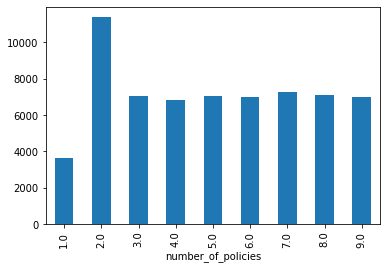

In [378]:
# value evaluation per number of policies
train.groupby('number_of_policies')['customer_lifetime_value'].mean().plot(kind = 'bar')

In [379]:
#converting number_of_policies into categorical varible
train.number_of_policies=train.number_of_policies.astype('category')
test.number_of_policies=test.number_of_policies.astype('category')

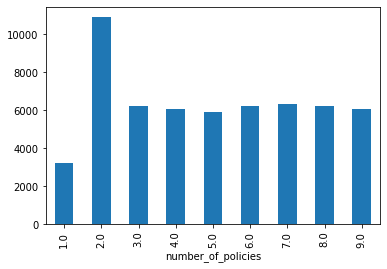

In [380]:
train.groupby('number_of_policies')['customer_lifetime_value'].median().plot(kind = 'bar')

## policy_type

In [381]:
train.policy_type

1        Personal Auto
2        Personal Auto
4        Personal Auto
6       Corporate Auto
7        Personal Auto
             ...      
9192    Corporate Auto
9193    Corporate Auto
9194    Corporate Auto
9195      Special Auto
9196     Personal Auto
Name: policy_type, Length: 6518, dtype: object

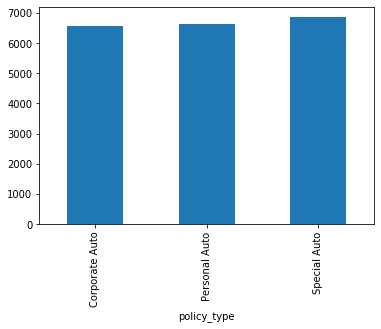

In [382]:
train.groupby('policy_type')['customer_lifetime_value'].mean().plot(kind = 'bar')

In [383]:
train.groupby('policy_type')['customer_lifetime_value'].sum().sort_values(ascending=False)

policy_type
Personal Auto    32236279.24
Corporate Auto    9241432.58
Special Auto      1783999.74
Name: customer_lifetime_value, dtype: float64

In [384]:
#converting policy type into categorical varible
train.policy_type=train.policy_type.astype('category')
test.policy_type=test.policy_type.astype('category')

## policy

In [385]:
train.policy.unique()

array(['Personal L2', 'Personal L1', 'Corporate L3', 'Personal L3',
       'Corporate L1', 'Corporate L2', 'Special L3', 'Special L1',
       'Special L2'], dtype=object)

In [386]:
train.groupby('policy')['customer_lifetime_value'].sum().sort_values(ascending=False)

policy
Personal L3    16237294.63
Personal L2    10197465.72
Personal L1     5801518.89
Corporate L3    4693787.05
Corporate L2    2651200.48
Corporate L1    1896445.06
Special L2       799675.90
Special L3       703123.23
Special L1       281200.60
Name: customer_lifetime_value, dtype: float64

In [387]:
train.groupby('policy')['customer_lifetime_value'].mean().sort_values(ascending=False)

policy
Special L1     7030.02
Corporate L1   6946.69
Special L2     6834.84
Special L3     6826.44
Personal L1    6676.09
Personal L3    6651.90
Personal L2    6626.03
Corporate L3   6510.11
Corporate L2   6388.43
Name: customer_lifetime_value, dtype: float64

In [388]:
#converting policy into categorical varible
train.policy=train.policy.astype('category')
test.policy=test.policy.astype('category')

## renew_offer_type

In [389]:
train.renew_offer_type.unique()

array(['Offer2', 'Offer1', 'Offer3', 'Offer4'], dtype=object)

In [390]:
train.groupby('renew_offer_type')['customer_lifetime_value'].mean().sort_values(ascending=False)

renew_offer_type
Offer1   7149.14
Offer3   6580.25
Offer2   6270.16
Offer4   5940.90
Name: customer_lifetime_value, dtype: float64

In [391]:
train.groupby('renew_offer_type')['customer_lifetime_value'].sum().sort_values(ascending=False)

renew_offer_type
Offer1   18816530.83
Offer2   13324087.61
Offer3    6784232.78
Offer4    4336860.34
Name: customer_lifetime_value, dtype: float64

In [392]:
#converting renew_offer_type into categorical varible
train.renew_offer_type=train.renew_offer_type.astype('category')
test.renew_offer_type=test.renew_offer_type.astype('category')

## sales_channel

In [393]:
train.sales_channel.unique()

array(['Agent', 'Branch', 'Web', 'Call Center'], dtype=object)

In [394]:
train.groupby('sales_channel')['customer_lifetime_value'].sum().sort_values(ascending=False)

sales_channel
Agent         16805460.13
Branch        11835002.88
Call Center    8294891.98
Web            6326356.57
Name: customer_lifetime_value, dtype: float64

In [395]:
#converting renew_offer_type into categorical varible
train.sales_channel=train.sales_channel.astype('category')
test.sales_channel=test.sales_channel.astype('category')

## total_claim_amount

In [396]:
train.total_claim_amount

1      565.51
2      369.82
4      345.60
6      478.75
7      381.96
        ...  
9192   449.82
9193   312.00
9194   236.90
9195   441.99
9196   547.20
Name: total_claim_amount, Length: 6518, dtype: float64

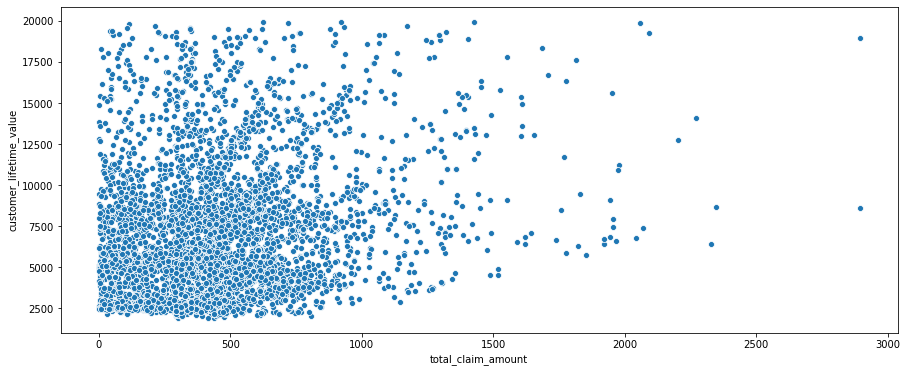

In [397]:
plt.figure(figsize = (15,6))
sns.scatterplot(train.total_claim_amount, train.customer_lifetime_value)
plt.show()

### from the above plot there seems to be some customers who claimed in large amount,i think its better to keep a threshold and remove those interpreting them as ouliers

In [398]:
train[train.total_claim_amount<2000]

,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,prior_claim
1,8005.96,Basic,College,Employed,M,63357.00,Suburban,Married,101.00,0.00,5.00,Personal Auto,Personal L2,Offer2,Agent,565.51,SUV,2.00,LOW
2,8646.50,Basic,High School or Below,Employed,F,64125.00,Urban,Married,108.00,0.00,3.00,Personal Auto,Personal L1,Offer2,Branch,369.82,SUV,1.00,HIGH
4,5595.97,Basic,Bachelor,Retired,F,19651.00,Suburban,Married,72.00,0.00,5.00,Personal Auto,Personal L1,Offer2,Web,345.60,Two-Door Car,3.00,HIGH
6,3653.70,Extended,College,Employed,F,74126.00,Suburban,Married,90.00,0.00,1.00,Corporate Auto,Corporate L3,Offer2,Call Center,478.75,Two-Door Car,2.00,MEDIUM
7,11154.68,Extended,Doctor,Employed,F,31409.00,Urban,Married,93.00,0.00,2.00,Personal Auto,Personal L3,Offer1,Branch,381.96,Four-Door Car,2.00,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9192,5116.62,Basic,High School or Below,Employed,F,26173.00,Suburban,Single,68.00,1.00,9.00,Corporate Auto,Corporate L1,Offer2,Web,449.82,Four-Door Car,2.00,HIGH
9193,2592.44,Basic,High School or Below,Employed,M,72421.00,Suburban,Married,65.00,0.00,1.00,Corporate Auto,Corporate L3,Offer2,Call Center,312.00,Four-Door Car,3.00,HIGH
9194,3103.92,Extended,College,Employed,F,74665.00,Urban,Married,78.00,2.00,1.00,Corporate Auto,Corporate L2,Offer2,Call Center,236.90,Four-Door Car,2.00,HIGH
9195,9161.66,Basic,High School or Below,Employed,F,91763.00,Urban,Married,113.00,0.00,3.00,Special Auto,Special L3,Offer1,Call Center,441.99,SUV,3.00,MEDIUM


In [399]:
train[train.total_claim_amount>2000]

,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,prior_claim
1516,6758.81,Basic,High School or Below,Unemployed,M,0.00,Suburban,Single,191.00,0.00,1.00,Personal Auto,Personal L2,Offer3,Web,2042.57,Luxury Car,2.00,MEDIUM
1663,8581.28,Extended,Bachelor,Medical Leave,M,27689.00,Suburban,Married,239.00,2.00,1.00,Personal Auto,Personal L2,Offer2,Web,2893.24,Luxury SUV,2.00,NaN
3147,7373.23,Basic,College,Employed,F,44938.00,Suburban,Married,183.00,0.00,1.00,Personal Auto,Personal L3,Offer2,Branch,2069.31,Luxury Car,1.00,HIGH
3598,8672.23,Extended,Bachelor,Unemployed,M,0.00,Suburban,Single,245.00,0.00,1.00,Corporate Auto,Corporate L3,Offer1,Branch,2345.41,Luxury SUV,2.00,LOW
7508,14084.49,Extended,Bachelor,Unemployed,M,0.00,Suburban,Single,208.00,0.00,3.00,Corporate Auto,Corporate L1,Offer2,Agent,2270.51,Luxury Car,2.00,MEDIUM
7521,12767.23,Basic,College,Unemployed,M,0.00,Suburban,Single,189.00,0.00,5.00,Corporate Auto,Corporate L2,Offer1,Branch,2201.33,Luxury Car,2.00,LOW
7765,18939.51,Extended,Master,Employed,F,26488.00,Suburban,Single,244.00,0.00,3.00,Personal Auto,Personal L1,Offer1,Agent,2893.24,Luxury SUV,2.00,HIGH
8217,19237.70,Basic,Bachelor,Unemployed,M,0.00,Suburban,Single,196.00,0.00,2.00,Corporate Auto,Corporate L1,Offer2,Call Center,2092.52,Luxury Car,2.00,LOW
8360,19849.74,Premium,College,Unemployed,M,0.00,Suburban,Single,286.00,0.00,9.00,Personal Auto,Personal L2,Offer1,Agent,2059.20,Luxury SUV,3.00,HIGH
8498,6383.61,Basic,College,Unemployed,F,0.00,Suburban,Single,196.00,2.00,1.00,Personal Auto,Personal L3,Offer2,Call Center,2327.17,Luxury SUV,3.00,MEDIUM


In [400]:
#clipping those who claimed more then 2000
train=train[train.total_claim_amount<2000]

In [401]:
train.shape

(6508, 19)

In [402]:
summary(train)

(6508, 19)


,Dtypes,NA's,Nunique,Levels
customer_lifetime_value,float64,0,5136,"[8005.964669, 8646.504109, 5595.971364999999, ..."
coverage,category,0,3,"[Basic, Extended, Premium] Categories (3, obje..."
education,category,0,5,"[College, High School or Below, Bachelor, Doct..."
employmentstatus,category,0,5,"[Employed, Retired, Unemployed, Medical Leave,..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,float64,0,3700,"[63357.0, 64125.0, 19651.0, 74126.0, 31409.0, ..."
location_code,category,0,3,"[Suburban, Urban, Rural] Categories (3, object..."
marital_status,category,0,3,"[Married, Divorced, Single] Categories (3, obj..."
monthly_premium_auto,float64,0,170,"[101.0, 108.0, 72.0, 90.0, 93.0, 110.0, 117.0,..."
number_of_open_complaints,category,0,6,"[0.00, 1.00, 2.00, 3.00, 4.00, 5.00] Categorie..."


## vehicle class

In [403]:
train.groupby('vehicle_class')['customer_lifetime_value'].sum().sort_values(ascending=False)

vehicle_class
Four-Door Car   19672304.71
SUV             10415160.54
Two-Door Car     7960149.91
Sports Car       2712972.23
Luxury SUV       1243522.43
Luxury Car       1134953.92
Name: customer_lifetime_value, dtype: float64

In [404]:
train.groupby('vehicle_class')['customer_lifetime_value'].mean().sort_values(ascending=False)

vehicle_class
Luxury SUV      12191.40
Luxury Car      11581.16
SUV              8372.32
Sports Car       8347.61
Four-Door Car    5839.21
Two-Door Car     5810.33
Name: customer_lifetime_value, dtype: float64

In [405]:
#converting vehicle_class into categorical varible
train.vehicle_class=train.vehicle_class.astype('category')
test.vehicle_class=test.vehicle_class.astype('category')

## vehicle size

In [406]:
#converting vehicle_size into categorical varible
train.vehicle_size=train.vehicle_size.astype('category')
test.vehicle_size=test.vehicle_size.astype('category')

In [407]:
train.groupby('vehicle_size')['customer_lifetime_value'].sum().sort_values(ascending=False)

vehicle_size
2.00   30386886.85
3.00    8422649.50
1.00    4329527.39
Name: customer_lifetime_value, dtype: float64

## Model building


In [408]:
x = train.drop('customer_lifetime_value' , axis=True)
y = train['customer_lifetime_value']

In [409]:
x.shape

(6508, 18)

In [410]:
test.shape

(1767, 18)

In [411]:
x.columns

Index(['coverage', 'education', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'prior_claim'],
      dtype='object')

In [412]:
test.columns

Index(['coverage', 'education', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'prior_claim'],
      dtype='object')

In [449]:
x_dummy = pd.get_dummies(x)
test_dum1 = pd.get_dummies(test)

In [214]:
x_dummy.head()

,income,monthly_premium_auto,total_claim_amount,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,number_of_open_complaints_1.0,number_of_open_complaints_2.0,number_of_open_complaints_3.0,number_of_open_complaints_4.0,number_of_open_complaints_5.0,number_of_policies_2.0,number_of_policies_3.0,number_of_policies_4.0,number_of_policies_5.0,number_of_policies_6.0,number_of_policies_7.0,number_of_policies_8.0,number_of_policies_9.0,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_2.0,vehicle_size_3.0,prior_claim_MEDIUM,prior_claim_LOW
1,63357.00,101.00,565.51,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,64125.00,108.00,369.82,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,19651.00,72.00,345.60,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
6,74126.00,90.00,478.75,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0
7,31409.00,93.00,381.96,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Splitting the train and test data

In [216]:
xtrain,xtest,ytrain,ytest = train_test_split(x_dummy , y , test_size=0.2)

### defining a function in which it instantiate model and then fit that model in train data and to predict train ,test predictions

In [221]:
def model_building(model):
    m=model
    m.fit(xtrain,ytrain)
    train_pred = m.predict(xtrain)
    test_pred = m.predict(xtest)
    print('=======Train======')
    print('MAPE: ', np.mean(np.abs((ytrain - train_pred)/ytrain))*100)
    print('RMSE: ',np.sqrt( mean_squared_error(ytrain,train_pred)))
    print('======Test======')
    print("MAPE:  ",np.mean(np.abs((ytest - test_pred)/ytest))*100)
    print('RMSE: ',np.sqrt( mean_squared_error(ytest,test_pred)))
    return m

## Model 1 : Linear Regression

In [222]:
lr2 = model_building(LinearRegression())

=======Train======
MAPE:  13.000397492669627
RMSE:  1454.9641150538805
======Test======
MAPE:   13.297506893428265
RMSE:  1576.0860615505042


## Model 2 : Decision Tree Regression

In [223]:
params = { "max_depth":range(1,15),  'min_samples_split':range(1,10) }
dc = model_building(GridSearchCV(DecisionTreeRegressor() , param_grid=params , cv=5,n_jobs=-1))

=======Train======
MAPE:  5.5937482737200614
RMSE:  998.638192635569
======Test======
MAPE:   8.060139528335956
RMSE:  1654.4803190659302


In [227]:
dc2 = model_building(DecisionTreeRegressor())

=======Train======
MAPE:  1.6809212878490325e-16
RMSE:  1.5844430542710528e-13
======Test======
MAPE:   6.93905313114829
RMSE:  1885.718987697323


## Model 3: Random Forest Regression

In [224]:
params = { "max_depth":range(1,15),"n_estimators":range(50,200,50)}
rf = model_building(GridSearchCV(RandomForestRegressor() , param_grid = params , cv=5 , n_jobs=-1) )

=======Train======
MAPE:  3.088120315847341
RMSE:  601.9765724164068
======Test======
MAPE:   6.197950771023712
RMSE:  1436.1073096410998


In [226]:
rf2 = model_building(RandomForestRegressor())

=======Train======
MAPE:  2.0557428975641603
RMSE:  492.3888557744531
======Test======
MAPE:   6.010848107457107
RMSE:  1449.250151817481


## XGBoost regression

In [225]:
xgb =model_building(XGBRegressor())

[14:35:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=======Train======
MAPE:  10.258908760774567
RMSE:  1342.5168981097886
======Test======
MAPE:   11.035285751683247
RMSE:  1525.4635132627006


In [229]:
las = model_building(Lasso())

=======Train======
MAPE:  12.803257797625033
RMSE:  1455.3797886990208
======Test======
MAPE:   13.085991998082886
RMSE:  1574.3802776036741


In [230]:
Rid = model_building(Ridge())

=======Train======
MAPE:  12.874346183994293
RMSE:  1455.0300148534543
======Test======
MAPE:   13.170273409583888
RMSE:  1576.0487986088945


## Test

In [231]:
test.columns

Index(['coverage', 'education', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'prior_claim'],
      dtype='object')

In [233]:
test.head()

,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,prior_claim
0,Basic,Bachelor,Employed,M,43836.00,Rural,Single,73.00,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize,HIGH
1,Extended,College,Employed,F,28812.00,Urban,Married,93.00,0,8,Special Auto,Special L2,Offer2,Branch,425.53,Four-Door Car,Medsize,MEDIUM
2,Premium,Master,Employed,M,77026.00,Urban,Married,110.00,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.03,Four-Door Car,Medsize,HIGH
3,Basic,Bachelor,Employed,F,24599.00,Rural,Married,64.00,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.92,Four-Door Car,Medsize,HIGH
4,Extended,Bachelor,Disabled,F,13789.00,Suburban,Divorced,79.00,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.20,Four-Door Car,Medsize,HIGH


In [239]:
test_dum1=test_dummy.fillna(test_dummy.mean())

In [429]:
train.employmentstatus.unique()

[Employed, Retired, Unemployed, Medical Leave, Disabled]
Categories (5, object): [Employed, Retired, Unemployed, Medical Leave, Disabled]

In [422]:
test_dummy.columns

Index(['income', 'monthly_premium_auto', 'total_claim_amount',
       'coverage_Extended', 'coverage_Premium', 'education_College',
       'education_Doctor', 'education_High School or Below',
       'education_Master', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Unemployed',
       'gender_M', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Married', 'marital_status_Single',
       'number_of_open_complaints_1', 'number_of_open_complaints_2',
       'number_of_open_complaints_3', 'number_of_open_complaints_4',
       'number_of_open_complaints_5', 'number_of_policies_2',
       'number_of_policies_3', 'number_of_policies_4', 'number_of_policies_5',
       'number_of_policies_6', 'number_of_policies_7', 'number_of_policies_8',
       'number_of_policies_9', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
   

In [421]:
x_dummy.columns

Index(['income', 'monthly_premium_auto', 'total_claim_amount',
       'coverage_Extended', 'coverage_Premium', 'education_College',
       'education_Doctor', 'education_High School or Below',
       'education_Master', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_M', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Married',
       'marital_status_Single', 'number_of_open_complaints_1.0',
       'number_of_open_complaints_2.0', 'number_of_open_complaints_3.0',
       'number_of_open_complaints_4.0', 'number_of_open_complaints_5.0',
       'number_of_policies_2.0', 'number_of_policies_3.0',
       'number_of_policies_4.0', 'number_of_policies_5.0',
       'number_of_policies_6.0', 'number_of_policies_7.0',
       'number_of_policies_8.0', 'number_of_policies_9.0',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_C

In [442]:
customer_lifetime_value=lr2.predict(test_dum1)

In [444]:
test_data= pd.read_csv('test-1574429501088.csv')

In [445]:
CustomerID=test_data.CustomerID

In [446]:
pred = pd.DataFrame(list(zip(CustomerID,customer_lifetime_value)) , columns=['CustomerID','Customer.Lifetime.Value'])

In [448]:
pred.to_csv('My_Submission1.csv' , index=False)